P6. Using CAMB, plot the evolution of the density parameters for matter, radiation, dark energy and curvature.

In [96]:
import camb
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G
import scipy.integrate as integrate
from scipy.constants import c

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.6.1


In [97]:
# Definición de la cosmología
H0 = 67.4 # hm/(sMpc)
omega_m = 0.315 # matter
omega_ch2 = 0.120 # CDM
omega_bh2 = 0.0224 # materia bariónica
ns = 0.965 # índice espectral
tau = 0.054

In [98]:
# help(camb.CAMBparams)
pars = camb.CAMBparams()
pars.set_cosmology(H0 = H0, ombh2 = omega_bh2, omch2 = omega_ch2, tau = tau)
pars.set_dark_energy(w=-1.0)
results = camb.get_results(pars)
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = True
   WantTransfer = False
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = False
     accurate_massive_neutrinos = False
     kmax = 0.9
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 6250.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.0224
   omch2 = 0.12
   omk = 0.0
   omnuh2 = 0.000644866570625114
   H0 = 67.4
   TCMB = 2.7255
   YHe = 0.24586829360147697
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   I

In [99]:
# Definimos redshift, factor de escala
z = np.linspace(0, 3000, 1000)
a = 1.0 / (1.0 + z)

In [100]:
# Necesitamos los parámetros de densidad de materia, radiación, dark energy y curvatura. Los obtenemos usando CAMB
Omega_m = results.get_Omega('cdm', z) + results.get_Omega('baryon', z) + results.get_Omega('nu', z)
Omega_r = results.get_Omega('photon', z) +  results.get_Omega('neutrino', z)
Omega_DE =  results.get_Omega('de', z)
Omega_k =  1 - Omega_m - Omega_r - Omega_DE # La suma de los Omega debe ser igual a 1

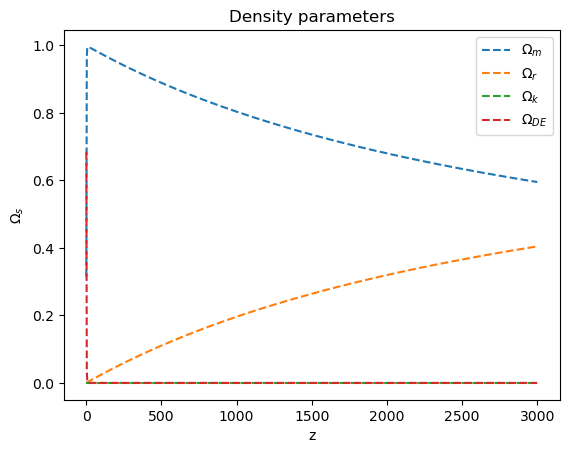

In [101]:
plt.figure()
plt.plot(z, Omega_m, label = r'$\Omega_m$', linestyle = 'dashed')
plt.plot(z, Omega_r, label = r'$\Omega_r$',linestyle = 'dashed')
plt.plot(z, Omega_k, label = r'$\Omega_k$',linestyle = 'dashed')
plt.plot(z, Omega_DE,label = r'$\Omega_{DE}$',linestyle = 'dashed')
plt.title('Density parameters')
plt.xlabel('z')
plt.ylabel('$\Omega_s$')
plt.legend()
plt.show()

P7. The distance duality relation gives
$$
D_L(z) = (1 + z)^2 D_A(z)
$$
where $D_L(z)$ and $D_A(z)$ are the luminosity distance and angular diameter distance, respectively, as a function of the redshift z. Using Python, Plot the lines of constant $f_K(\chi)$ in the plane $\Omega_{m,0} - \Omega_{\Lambda,0}$, where
$$
f_K(\chi) =
\begin{cases}
\frac{c}{H_0 \sqrt{\Omega_{K,0}}} \sinh\left(\sqrt{\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right), & \Omega_{k,0} > 0 \\
\frac{c}{H_0} \int_0^z \frac{dx}{E(x)}, & \Omega_{k,0} = 0 \\
\frac{c}{H_0 \sqrt{-\Omega_{K,0}}} \sin\left(\sqrt{-\Omega_{K,0}} \int_0^z \frac{dx}{E(x)}\right), & \Omega_{k,0} < 0
\end{cases}
$$


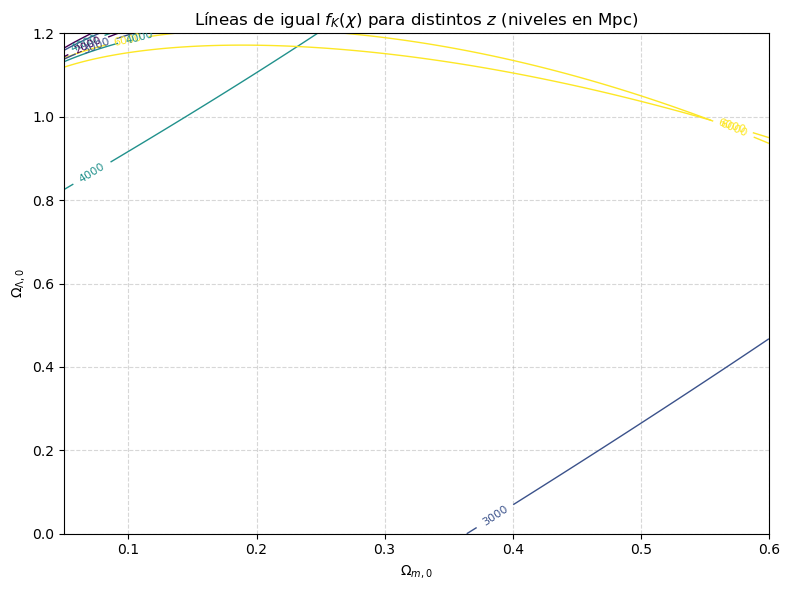

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constantes
c_km_s = 300000 # km/s

# Parámetros fijos (puedes cambiarlos)
H0 = 67.4  # km/s/Mpc
h = H0 / 100.0
# Aquí tomamos densidades físicas ejemplo (puedes ajustarlas)
omega_bh2 = 0.0224
omega_ch2 = 0.120
Omega_b0 = omega_bh2 / h**2
Omega_c0_default = omega_ch2 / h**2
Omega_r0 = 4.15e-5 / h**2  # fotones + neutrinos relativistas (aprox)

# Función E(z) dada (según Omega_m, Omega_L, Omega_r, y Omega_k)
def E_of_z(z, Omega_m0, Omega_L0, Omega_r0, Omega_k0):
    return np.sqrt(Omega_m0 * (1+z)**3 + Omega_r0 * (1+z)**4 + Omega_L0 + Omega_k0 * (1+z)**2)

# Comoving radial distance integral chi = (c/H0) * integral_0^z dz'/E(z')
def comoving_chi(z, Omega_m0, Omega_L0, Omega_r0):
    # Omega_k0 is determined by closure: Omega_k0 = 1 - Om - Or - OΛ
    Omega_k0 = 1.0 - (Omega_m0 + Omega_r0 + Omega_L0)

    integrand = lambda zp: 1.0 / E_of_z(zp, Omega_m0, Omega_L0, Omega_r0, Omega_k0)
    I, _ = quad(integrand, 0.0, z, epsabs=1e-8, epsrel=1e-8, limit=200)
    # chi in units of c/H0 (dimensionless) -> multiply by c/H0 to get Mpc
    chi_Mpc = (c_km_s / H0) * I  # Mpc
    return chi_Mpc, Omega_k0

# fK(chi) following las tres ramas del enunciado
def fK_of_chi(chi_Mpc, Omega_k0):
    # Argument for trig/hyperbolic functions uses sqrt(|Omega_k|) * chi' where
    # chi' = integral without c/H0 factor. But since we calculated chi_Mpc = (c/H0)*I,
    # we need to use the dimensionless product sqrt(|Omega_k|)*I (I = chi_Mpc * H0 / c)
    # Simpler: compute x = sqrt(|Omega_k|) * (H0/c) * chi_Mpc = sqrt(|Omega_k|) * I
    # Recover I:
    I_dimless = chi_Mpc * (H0 / c_km_s)
    if Omega_k0 > 0:
        sqrtOk = np.sqrt(Omega_k0)
        return (c_km_s / H0) / sqrtOk * np.sinh(sqrtOk * I_dimless)  # Mpc
    elif Omega_k0 < 0:
        sqrtMinus = np.sqrt(-Omega_k0)
        return (c_km_s / H0) / sqrtMinus * np.sin(sqrtMinus * I_dimless)  # Mpc
    else:
        # Omega_k0 == 0: fK = (c/H0) * I = chi_Mpc
        return chi_Mpc

# Malla en el plano Omega_m0 - Omega_L0
Om_m_vals = np.linspace(0.05, 0.6, 180)     # ajusta rango/ resolución si quieres
Om_L_vals = np.linspace(0.0, 1.2, 200)

# Redshifts para los que trazamos líneas de nivel (puedes cambiar)
z_list = [1, 10, 20]

# Prepara figura
fig, ax = plt.subplots(figsize=(8,6))

# Para cada z construimos la matriz fK(chi)
contour_levels = [2000, 3000, 4000, 6000]  # niveles de fK en Mpc

for z in z_list:
    FK = np.zeros((Om_L_vals.size, Om_m_vals.size))  # filas: Omega_L, columnas: Omega_m
    for i, OmL in enumerate(Om_L_vals):
        for j, Omm in enumerate(Om_m_vals):
            # Radiación se toma constante Omega_r0 definido arriba
            chi_Mpc, Ok0 = comoving_chi(z, Omm, OmL, Omega_r0)
            FK[i, j] = fK_of_chi(chi_Mpc, Ok0)

    # Trazar contornos
    CS = ax.contour(Om_m_vals, Om_L_vals, FK, levels=contour_levels,
                    linestyles='solid', linewidths=1.0)
    ax.clabel(CS, inline=1, fontsize=8, fmt='%1.0f')
    # Añadimos etiqueta manual para cada conjunto de contornos
    ax.set_title('Líneas de igual $f_K(\\chi)$ para distintos $z$ (niveles en Mpc)')
    ax.set_xlabel(r'$\Omega_{m,0}$')
    ax.set_ylabel(r'$\Omega_{\Lambda,0}$')

# Ajustes visuales
ax.grid(True, ls='--', alpha=0.5)
ax.set_xlim(Om_m_vals.min(), Om_m_vals.max())
ax.set_ylim(Om_L_vals.min(), Om_L_vals.max())
plt.tight_layout()
plt.show()


Ya que nos $f_K$ depende de $E(z)$, definimos la ecuación de Friedmann para calcular
$$
E(z) = \frac{H(z)}{H_0}
$$
Dejamos fijo $\Omega_{r,0}$.

Además definimos $f_K$ y graficamos.

In [105]:
def E(z, Omega_m0, Omega_L0):
    Omega_m0 = np.asarray(Omega_m0)
    Omega_L0 = np.asarray(Omega_L0)
    z = np.asarray(z)
    
    # Calcular Omega_k0 con broadcasting correcto para array 3D
    Omega_k0 = 1 - Omega_m0[:, None] - Omega_L0[None, :] - Omega_r0
    
    # Crear array 3D: [z, Omega_m0, Omega_L0]
    a = 1 / (1 + z[:, None, None])
    
    E_val = np.sqrt(Omega_r0 * a**-4 + 
                   Omega_m0[None, :, None] * a**-3 + 
                   Omega_L0[None, None, :] + 
                   Omega_k0[None, :, :] * a**-2)
    return E_val


def f_K(z, Omega_m0, Omega_L0):
    Omega_r0 = 8.4 * 10 ** -5
    M_F_K = np.zeros((len(Omega_m0), len(Omega_L0))) # matriz de zeros
    M_E = E(z, Omega_m0, Omega_L0)
    chi = np.zeros((len(Omega_m0), len(Omega_L0)))

    for i in range(0, len(Omega_m0)):
        for j in range(0, len(Omega_L0)):
            chi[i,j] = integrate.trapezoid(1 / M_E[:, i, j],  z)

    for i in range(0, len(Omega_L0)):
        for j in range(0, len(Omega_L0)):
            Omega_k0 = 1 - (Omega_m0[i] + Omega_L0[j] + Omega_r0)

            if Omega_k0 > 0:
                M_F_K[i,j] = (c / (H0 * np.sqrt(Omega_k0))) * np.sinh(np.sqrt(Omega_k0) * chi[i,j])
            if Omega_k0 == 0:
                M_F_K[i,j] = (c / H0) * chi
            if Omega_k0 < 0:
                M_F_K[i,j] = (c / (H0 * np.sqrt(-1 * Omega_k0))) * np.sinh(np.sqrt(-1 * Omega_k0) * chi[i,j])

    
    return M_F_K

/var/folders/0k/1zy3svw54sq6ndrsll9m5jz80000gn/T/ipykernel_30001/878834224.py:23: RuntimeWarning: invalid value encountered in sqrt
  E_val = np.sqrt(Omega_r0 * a**-4 +


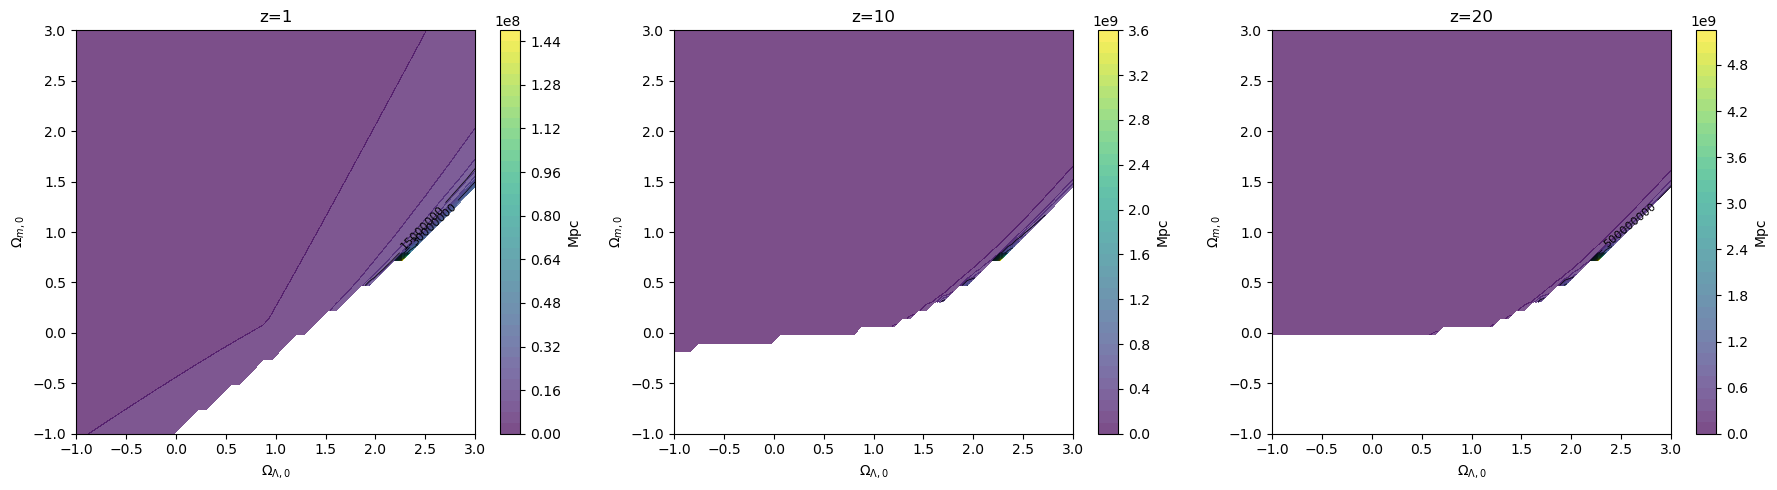

In [110]:
x = np.linspace(-1, 3, 50)
y = np.linspace(-1, 3, 50)

z1 = np.linspace(0, 10, 100)
z2 = np.linspace(0, 20, 100)
z3 = np.linspace(0, 1, 100)

f_K1 = f_K(z1, x, y)
f_K2 = f_K(z2, x, y)
f_K3 = f_K(z3, x, y)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# z=1
cs1 = axes[0].contour(x, y, f_K3, levels=10, colors='black', linewidths=0.5)
axes[0].clabel(cs1, inline=True, fontsize=8)
im1 = axes[0].contourf(x, y, f_K3, levels=40, alpha=0.7)
axes[0].set_xlabel('$\Omega_{\Lambda,0}$')
axes[0].set_ylabel('$\Omega_{m,0}$')
axes[0].set_title('z=1')
plt.colorbar(im1, ax=axes[0], label='Mpc')

# z=10
cs2 = axes[1].contour(x, y, f_K1, levels=10, colors='black', linewidths=0.5)
axes[1].clabel(cs2, inline=True, fontsize=8)
im2 = axes[1].contourf(x, y, f_K1, levels=40, alpha=0.7)
axes[1].set_xlabel('$\Omega_{\Lambda,0}$')
axes[1].set_ylabel('$\Omega_{m,0}$')
axes[1].set_title('z=10')
plt.colorbar(im2, ax=axes[1], label='Mpc')

# z=20
cs3 = axes[2].contour(x, y, f_K2, levels=10, colors='black', linewidths=0.5)
axes[2].clabel(cs3, inline=True, fontsize=8)
im3 = axes[2].contourf(x, y, f_K2, levels=40, alpha=0.7)
axes[2].set_xlabel('$\Omega_{\Lambda,0}$')
axes[2].set_ylabel('$\Omega_{m,0}$')
axes[2].set_title('z=20')
plt.colorbar(im3, ax=axes[2], label='Mpc')

plt.tight_layout()
plt.show()